In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks")

In [2]:
df = pd.read_csv("data/exportedDataMerged.csv")

/home/marc/git/isw/data_science/venv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (84,85,86,90,91,92,93) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.shape

(308399, 94)

In [4]:
df.head()

,time,swtid,xacc,yacc,zacc,xmag,ymag,zmag,humi,pres,...,leckage 7 (0/1),SWT-ID,Order-Type,Produkt Top,Produkt Bottom,Produkt Stift,Anzahl Zyklen,Ungeplanter Fehler (0/1),Fehlerstation,Fehlerteil
0,2019-09-09 11:13:00.050000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-09-09 11:13:00.100000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-09-09 11:13:00.150000+00:00,1.0,228.0,-112.0,-4184.0,-868.0,644.0,-6.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-09-09 11:13:00.200000+00:00,1.0,236.0,-116.0,-4184.0,-868.0,644.0,-6.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-09-09 11:13:00.250000+00:00,1.0,228.0,-92.0,-4184.0,-1061.0,765.0,-285.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df = df.dropna().reset_index()

In [6]:
df.head()

,index,time,swtid,xacc,yacc,zacc,xmag,ymag,zmag,humi,...,leckage 7 (0/1),SWT-ID,Order-Type,Produkt Top,Produkt Bottom,Produkt Stift,Anzahl Zyklen,Ungeplanter Fehler (0/1),Fehlerstation,Fehlerteil
0,1799,2019-09-09 11:14:30+00:00,1.0,-40.0,220.0,-4164.0,-308.0,560.0,577.0,14.01,...,0,1,1,Schwarz,Schwarz,Rot,21,1,5,0
1,1800,2019-09-09 11:14:30.050000+00:00,1.0,-40.0,220.0,-4164.0,-308.0,560.0,577.0,14.01,...,0,1,1,Schwarz,Schwarz,Rot,21,1,5,0
2,1801,2019-09-09 11:14:30.100000+00:00,1.0,-40.0,220.0,-4164.0,-308.0,560.0,577.0,14.01,...,0,1,1,Schwarz,Schwarz,Rot,21,1,5,0
3,1802,2019-09-09 11:14:30.150000+00:00,1.0,152.0,-100.0,-4228.0,-296.0,548.0,530.0,14.01,...,0,1,1,Schwarz,Schwarz,Rot,21,1,5,0
4,1803,2019-09-09 11:14:30.200000+00:00,1.0,184.0,28.0,-4152.0,-296.0,548.0,530.0,14.01,...,0,1,1,Schwarz,Schwarz,Rot,21,1,5,0


In [7]:
# 0% fun with this kind of labelling
df["leckage 7 (0/1)"].unique()

array([0.0, '0', '-', '1', 1], dtype=object)

In [8]:
# -> cleanup

# replace non numeric type by class 2
df["leckage 7 (0/1)"] = df["leckage 7 (0/1)"].replace("-", 2)
print("Unique entries after replacement: ",df["leckage 7 (0/1)"].unique())

# downcast everything to integer
df["leckage 7 (0/1)"] = pd.to_numeric(df["leckage 7 (0/1)"], downcast="integer")
print("Unique entries after cast: ",df["leckage 7 (0/1)"].unique())

# give categories informative names to reduce confusion
df["leckage 7 (0/1)"] = df["leckage 7 (0/1)"].replace(2, "not available")
df["leckage 7 (0/1)"] = df["leckage 7 (0/1)"].replace(0, "no leakage")
df["leckage 7 (0/1)"] = df["leckage 7 (0/1)"].replace(1, "leakage")

# use internal pandas magic for categorical data
df["leckage 7 (0/1)"] = pd.Categorical(df["leckage 7 (0/1)"], categories=["no leakage", "leakage", "not available"])
print("Categorical labels: ", df["leckage 7 (0/1)"].unique())

Unique entries after replacement:  [0.0 '0' 2 '1' 1]
Unique entries after cast:  [0 2 1]
Categorical labels:  [no leakage, not available, leakage]
Categories (3, object): [no leakage, not available, leakage]


In [9]:
df.columns

Index(['index', 'time', 'swtid', 'xacc', 'yacc', 'zacc', 'xmag', 'ymag',
       'zmag', 'humi', 'pres', 'temp', 'batvold', 'I_IMS1_IL', 'I_IMS1_IR',
       'I_IMS3A_B3', 'I_IMS3A_B4', 'I_IMS3A_IL', 'I_IMS3A_IR', 'I_IMS3B_B3',
       'I_IMS3B_B4', 'I_IMS3B_IL', 'I_IMS3B_IR', 'I_IMS4A_B3', 'I_IMS4A_B4',
       'I_IMS4A_IL', 'I_IMS4A_IR', 'I_IMS4B_B3', 'I_IMS4B_B4', 'I_IMS4B_IL',
       'I_IMS4B_IR', 'I_IMS5A_B3', 'I_IMS5A_B4', 'I_IMS5A_B5', 'I_IMS5A_B6',
       'I_IMS5A_IL', 'I_IMS5A_IR', 'I_IMS5B_B3', 'I_IMS5B_B4', 'I_IMS5B_B5',
       'I_IMS5B_B6', 'I_IMS5B_IL', 'I_IMS5B_IR', 'I_IMS7_B3', 'I_IMS7_B4',
       'I_IMS7_B5', 'I_IMS7_B6', 'I_IMS7_B7', 'I_IMS7_IL', 'I_IMS7_IR',
       'Ladetemperatur_PT100', 'Q_IMS1_QR', 'Q_IMS1_QS', 'Q_IMS3A_M1',
       'Q_IMS3A_M2', 'Q_IMS3A_QR', 'Q_IMS3A_QS', 'Q_IMS3B_M1', 'Q_IMS3B_M2',
       'Q_IMS3B_QR', 'Q_IMS3B_QS', 'Q_IMS4A_M1', 'Q_IMS4A_M2', 'Q_IMS4A_QR',
       'Q_IMS4A_QS', 'Q_IMS4B_M1', 'Q_IMS4B_M2', 'Q_IMS4B_QR', 'Q_IMS4B_QS',
       'Q_IMS5A_M

In [10]:
# labels of feature columns use for ML
label_name = "leckage 7 (0/1)"
feature_cols = ["xacc", "yacc", "zacc", "xmag", "ymag", "zmag", "humi", "pres", "temp", "batvold"]

In [11]:
# from now on, we only use interesting columns... Note: this is no copy, only a reference
df_ml = df[feature_cols + [label_name]]

In [12]:
# only use random subset of data for model research
df_ml = df_ml.sample(frac=0.05).reset_index()

In [13]:
df_ml.head()


,index,xacc,yacc,zacc,xmag,ymag,zmag,humi,pres,temp,batvold,leckage 7 (0/1)
0,192660,272.0,-196.0,-4176.0,-2606.0,6764.0,-1828.0,16.17,984.29,37.55,1808.0,not available
1,94189,224.0,-108.0,-4176.0,-1067.0,717.0,-225.0,12.92,984.73,41.88,1756.0,not available
2,8506,-452.0,-1008.0,-3960.0,101.0,233.0,-138.0,18.12,985.03,36.28,1702.0,no leakage
3,267780,1156.0,968.0,-4260.0,-2371.0,5914.0,-1756.0,19.26,984.07,33.57,1719.0,leakage
4,36911,140.0,112.0,-4144.0,-181.0,324.0,259.0,17.03,984.90,37.74,1703.0,not available


In [15]:
df_ml.shape

(15105, 12)

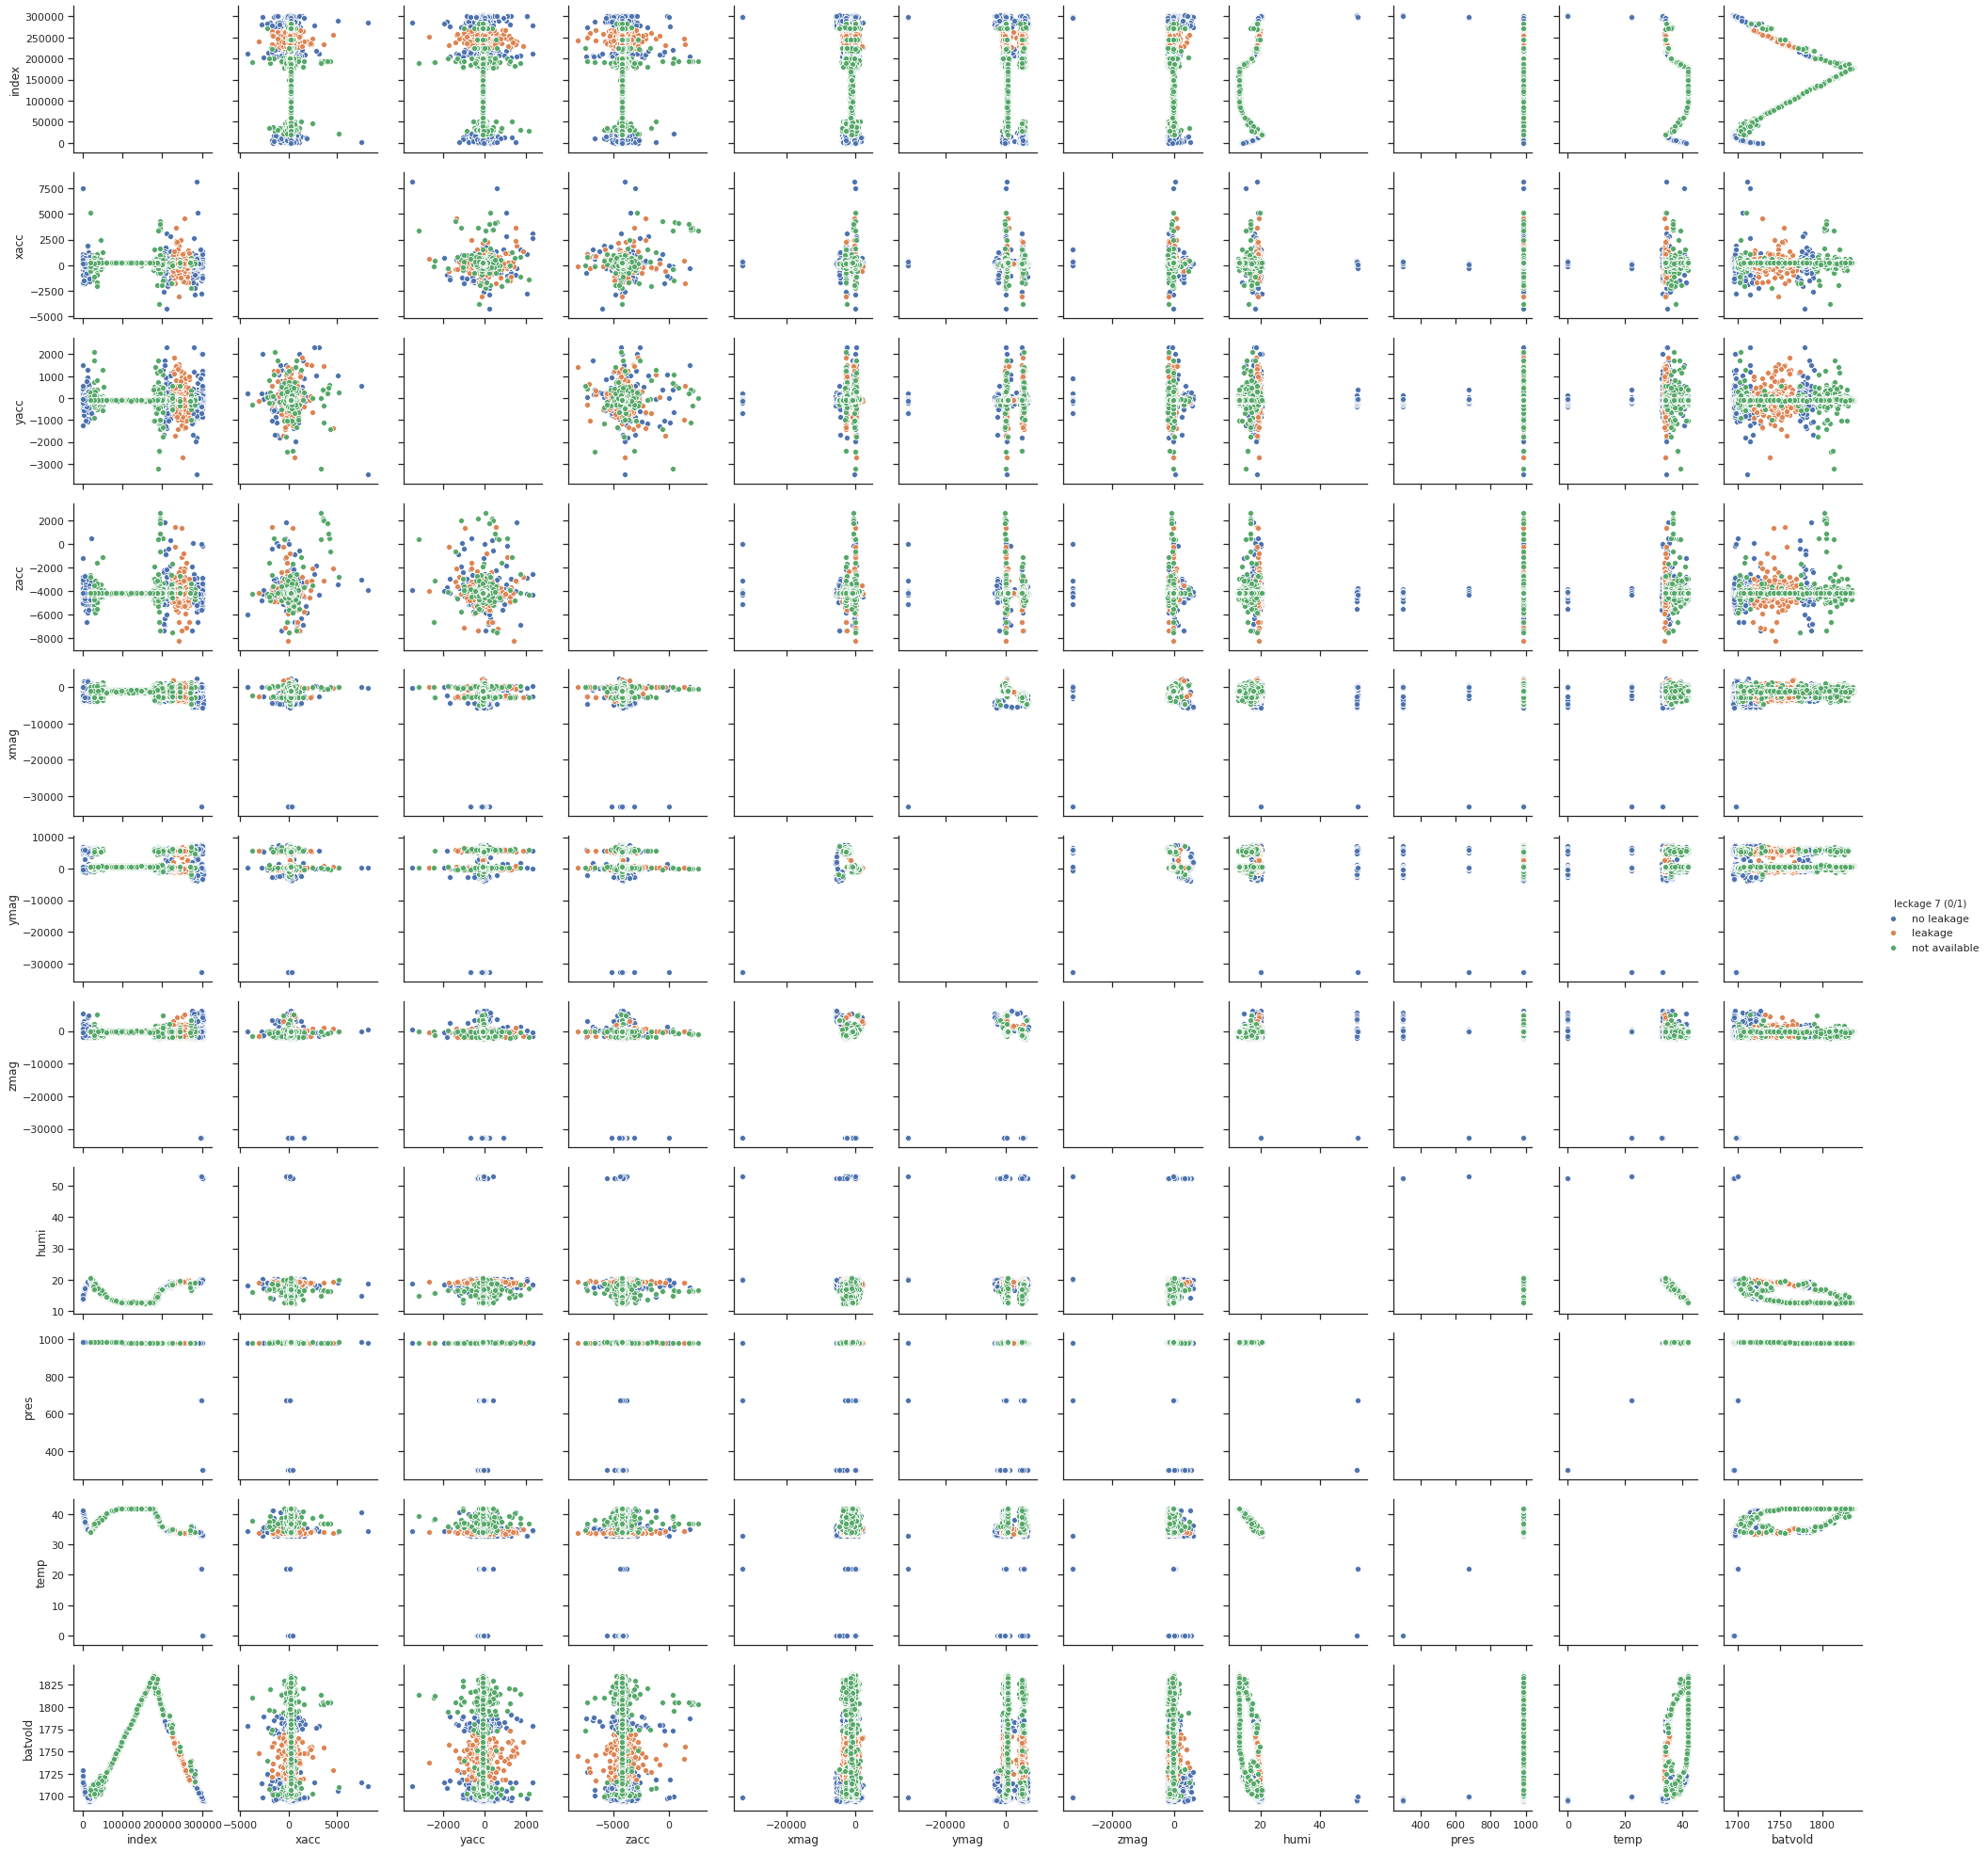

In [16]:
# first: get quick overview over data distrubution and correlation patterns
sns.pairplot(df_ml, hue=label_name, diag_kind="histogram")

In [15]:
from sklearn.model_selection import train_test_split


X = df_ml[feature_cols].values
y_cat = df_ml[label_name].values
y = y_cat.codes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)


In [16]:
# nearest neighbors classification
from sklearn import neighbors
from sklearn.metrics import accuracy_score

n_neighbors = 2
clf = neighbors.KNeighborsClassifier(n_neighbors, weights="uniform")
clf.fit(X, y)


y_pred = clf.predict(X_test)
score = accuracy_score(y_test, y_pred)
"Neighbors: {}, score: {}".format(n_neighbors, score)

'Neighbors: 2, score: 0.9106551952349438'

In [17]:
# back to categories:
y_cat.categories[y_pred]

Index(['not available', 'leakage', 'not available', 'not available',
       'not available', 'not available', 'not available', 'not available',
       'not available', 'not available',
       ...
       'not available', 'not available', 'not available', 'not available',
       'leakage', 'no leakage', 'no leakage', 'not available', 'not available',
       'leakage'],
      dtype='object', length=1511)

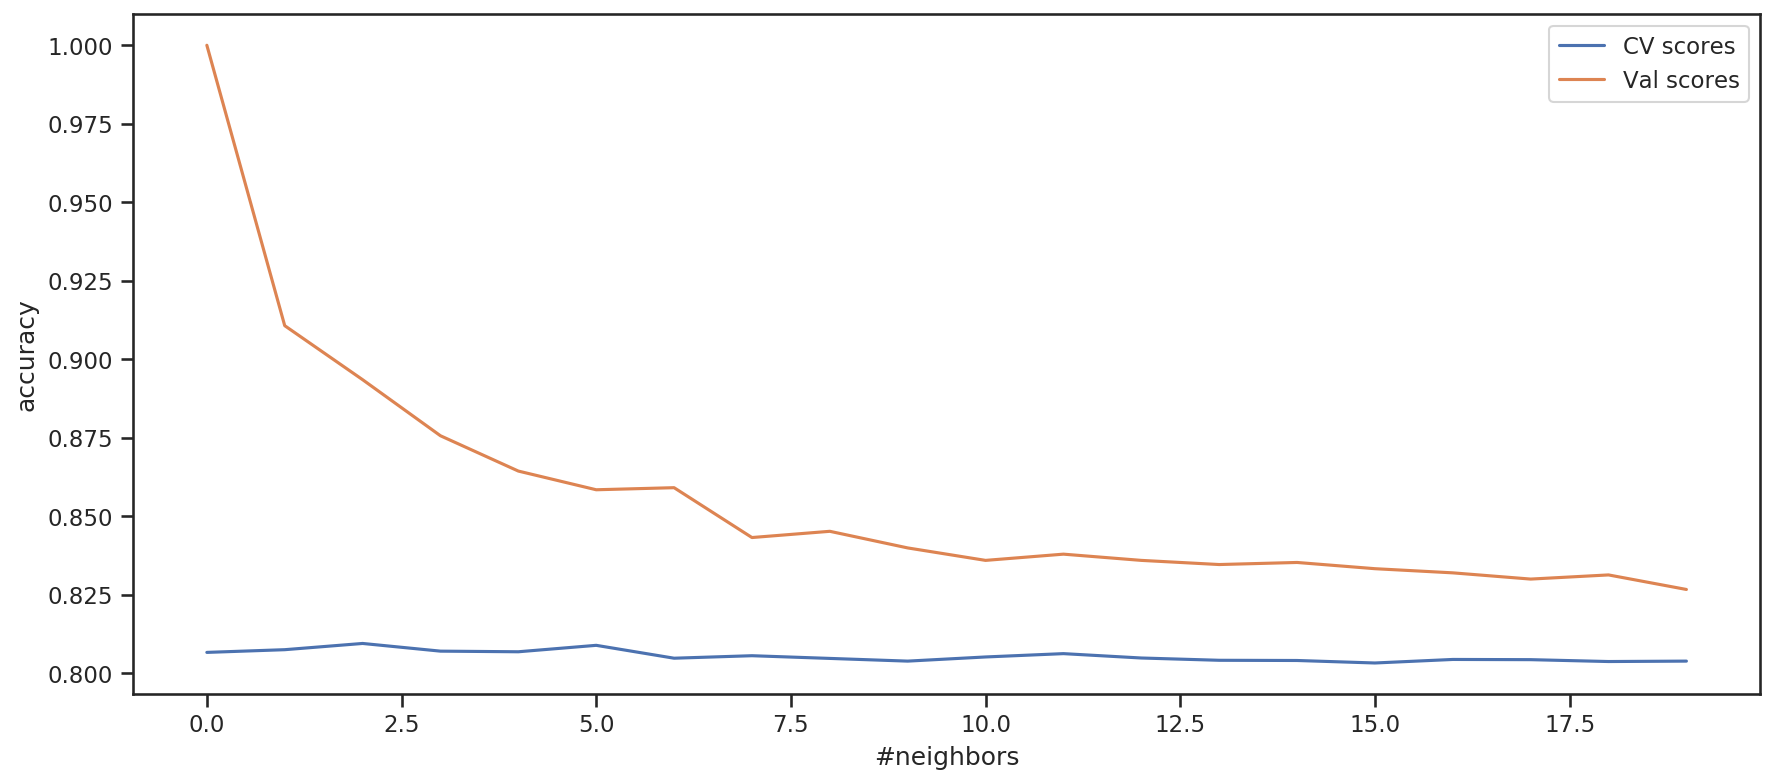

In [28]:
# cross validation
from sklearn.model_selection import cross_val_score

cv_scores = []
val_scores = []

for n in range(1, 21):
    clf = neighbors.KNeighborsClassifier(n, weights="uniform")
    scores = cross_val_score(clf, X, y, cv=5)
    cv_scores.append(scores.mean())
    
    clf.fit(X, y)
    y_pred = clf.predict(X_test)
    val_scores.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(14, 6), dpi=150)
plt.plot(cv_scores, label="CV scores")
plt.plot(val_scores, label="Val scores")
plt.xlabel("#neighbors")
plt.ylabel("accuracy")
plt.legend()
    



In [38]:
from sklearn.svm import LinearSVC

clf = LinearSVC(max_iter=2000)
clf.fit(X, y)
y_pred = clf.predict(X_test)
print("Score on validation: {}".format(accuracy_score(y_test, y_pred)))
scores = cross_val_score(clf, X, y, cv=5)
print("Mean cv score: {}".format(scores.mean()))

/home/marc/git/isw/data_science/venv/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Score on validation: 0.71343481138319


/home/marc/git/isw/data_science/venv/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/marc/git/isw/data_science/venv/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/marc/git/isw/data_science/venv/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/marc/git/isw/data_science/venv/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Mean cv score: 0.6876535838759035


/home/marc/git/isw/data_science/venv/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [26]:
from sklearn import tree

max_tree_depth = 20
clf = tree.DecisionTreeClassifier(max_depth=max_tree_depth)
clf.fit(X, y)


y_pred = clf.predict(X_test)
score = accuracy_score(y_test, y_pred)
"Depth: {}, score: {}".format(max_tree_depth, score)


'Depth: 20, score: 1.0'

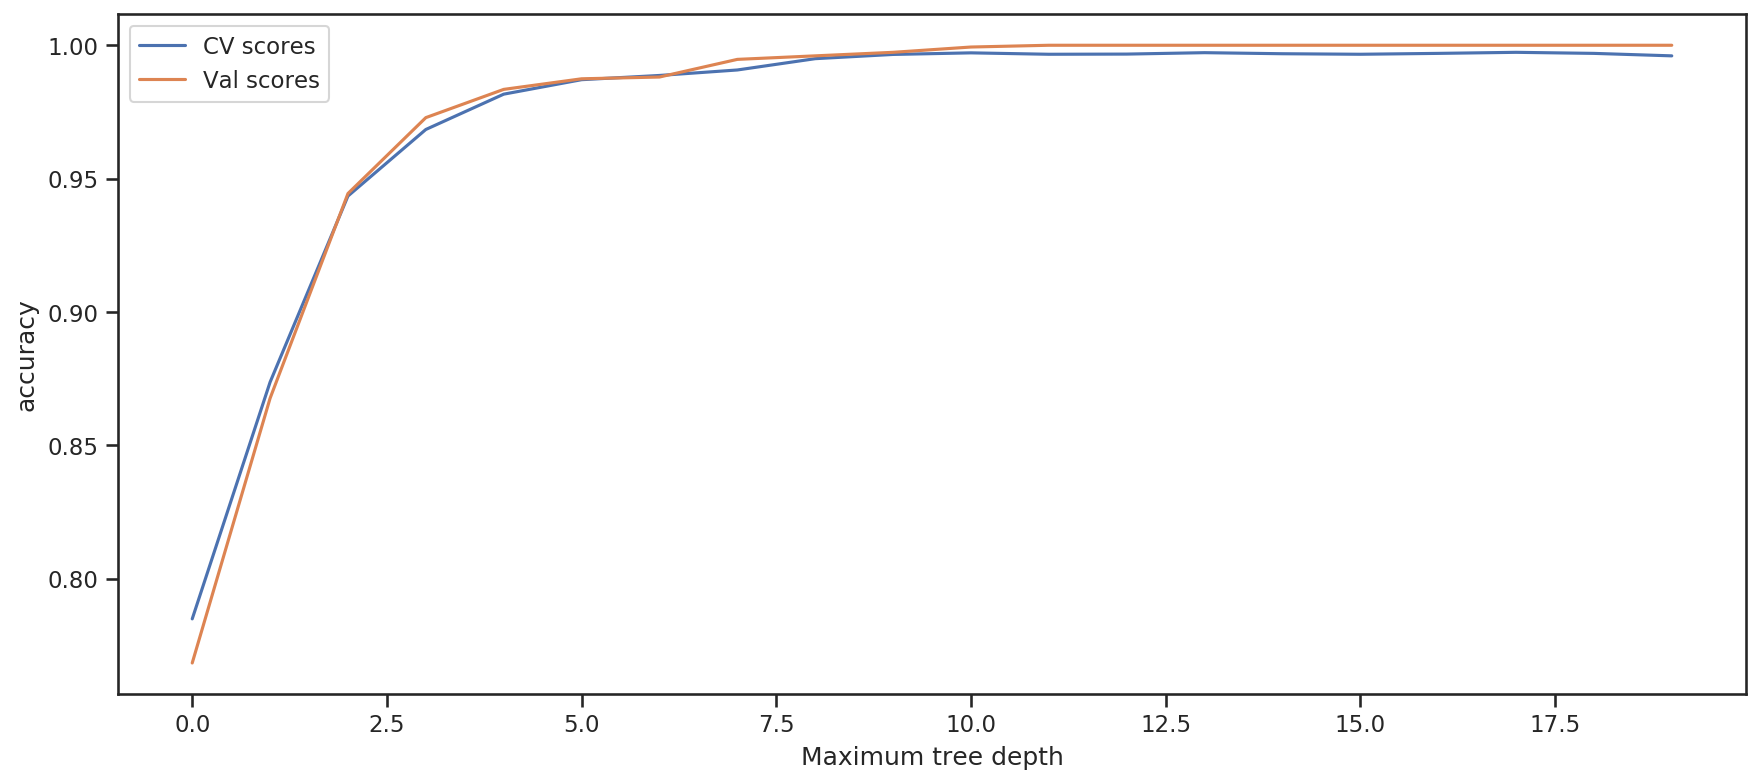

In [29]:
cv_scores = []
val_scores = []

for n in range(1, 21):
    clf = tree.DecisionTreeClassifier(max_depth=n)
    scores = cross_val_score(clf, X, y, cv=5)
    cv_scores.append(scores.mean())
    
    clf.fit(X, y)
    y_pred = clf.predict(X_test)
    val_scores.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(14, 6), dpi=150)
plt.plot(cv_scores, label="CV scores")
plt.plot(val_scores, label="Val scores")
plt.xlabel("Maximum tree depth")
plt.ylabel("accuracy")
plt.legend()

In [33]:
from sklearn.linear_model import Perceptron


penalty = "l2"
clf = Perceptron(penalty)
clf.fit(X, y)


y_pred = clf.predict(X_test)
score = accuracy_score(y_test, y_pred)
"Regularizer: {}, score: {}".format(penalty, score)

'Regularizer: l2, score: 0.6823295830575777'

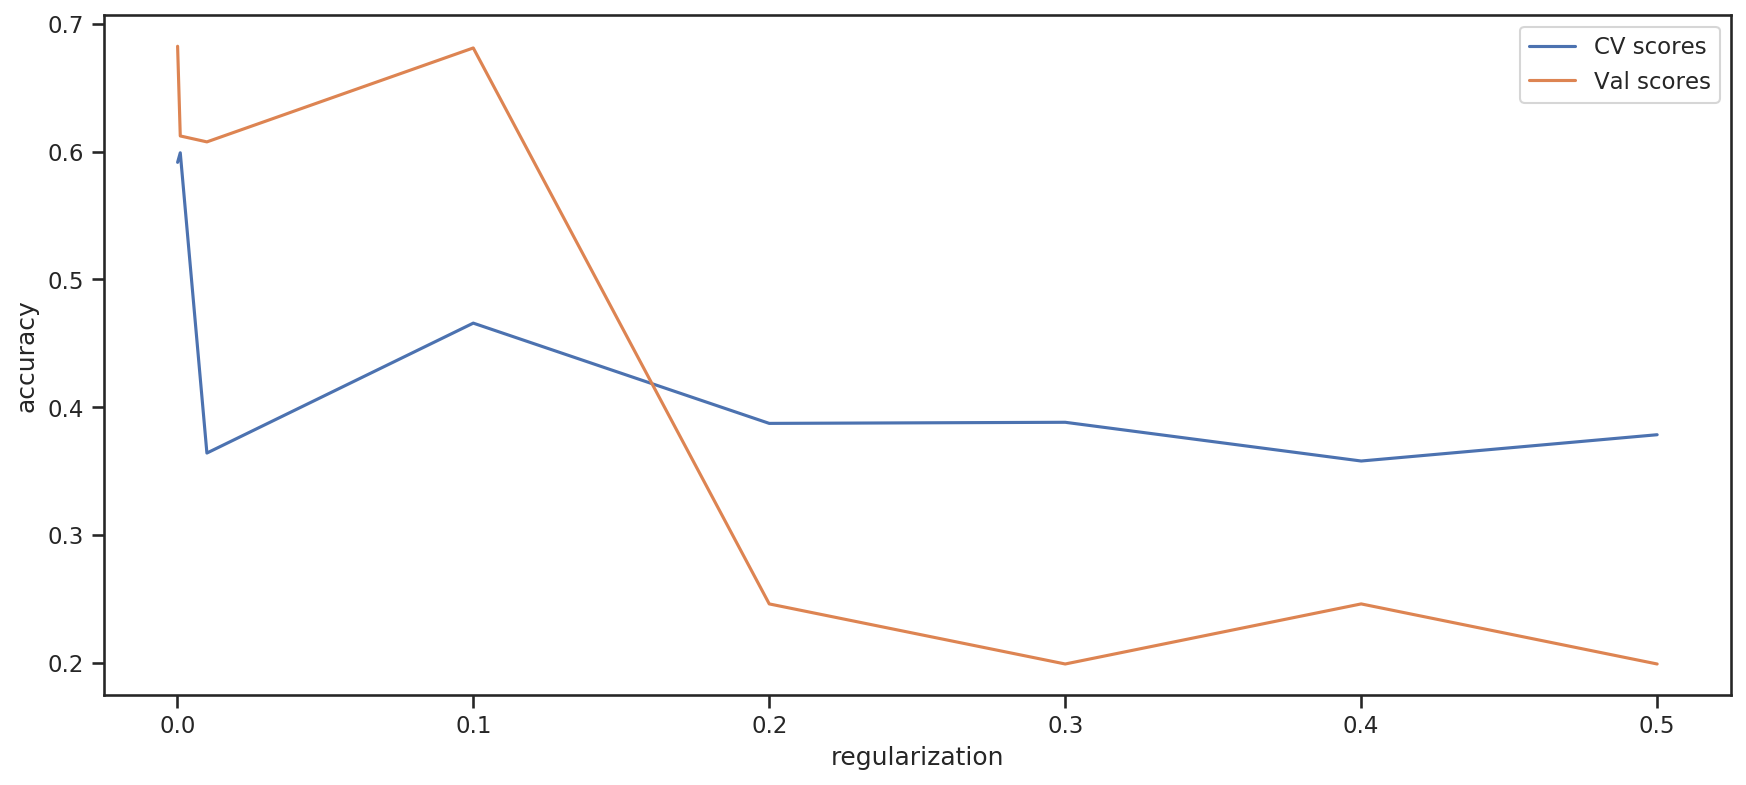

In [35]:

cv_scores = []
val_scores = []

reg = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5]
penalty = "l2"
for alpha in reg:
    clf = Perceptron(penalty, alpha=alpha)
    scores = cross_val_score(clf, X, y, cv=5)
    cv_scores.append(scores.mean())
    
    clf.fit(X, y)
    y_pred = clf.predict(X_test)
    val_scores.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(14, 6), dpi=150)
plt.plot(reg,cv_scores, label="CV scores")
plt.plot(reg,val_scores, label="Val scores")
plt.xlabel("regularization")
plt.ylabel("accuracy")
plt.legend()